###### We will be using cleaned dataset and deploy aur model 

In [1]:
## Import Dependries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Output_value,ScheduledDay_year,...,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,Delta_days
0,0,62,0,1,0,0,0,0,0,2016,...,38,4,2016,4,17,29,23,59,4,463464.0
1,1,56,0,0,0,0,0,0,0,2016,...,8,4,2016,4,17,29,23,59,4,679008.0
2,0,62,0,0,0,0,0,0,0,2016,...,19,4,2016,4,17,29,23,59,4,663720.0
3,0,8,0,0,0,0,0,0,0,2016,...,29,4,2016,4,17,29,23,59,4,562272.0
4,0,56,0,1,1,0,0,0,0,2016,...,7,4,2016,4,17,29,23,59,4,680544.0


In [4]:
x=data.drop('Output_value',axis=1)
y=data['Output_value']

In [5]:
## Split the data into 0.25 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
## Making a Pipeline 
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('Random-Forest', RandomForestClassifier())], verbose = True)

In [8]:
## Now fitting the data into pipe
pipe.fit(x_train,y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing Random-Forest, total=  39.0s


Pipeline(steps=[('pca', PCA(n_components=2)), ('std', StandardScaler()),
                ('Random-Forest', RandomForestClassifier())],
         verbose=True)

In [9]:
## Now Let's predict the values
y_pred = pipe.predict(x_test)

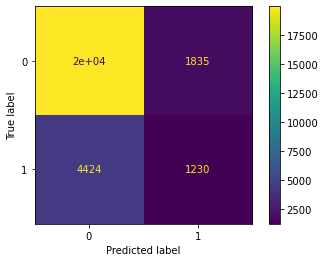

In [10]:
## Now let's view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)